## Librerías

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import os
import spacy
#importamos de nltk herramienta de Stemming
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt
MAINDIR = "./gdrive/My Drive/NLP_Movie/"

In [0]:
language = "en_core_web_sm" #seleccionar idioma
nlp = spacy.load(language)
ps = PorterStemmer()

Categ1 = 'pos'
Docs1 = './gdrive/My Drive/nltk_data/corpora/movie_reviews/pos/'
Categ2 = 'neg'
Docs2 = './gdrive/My Drive/nltk_data/corpora/movie_reviews/neg/'

## Carga de datos

In [0]:
allDocs= [(doc, nlp(open(Docs1+doc).read()), Categ1) for doc in os.listdir(Docs1)]
allDocs+= [(doc, nlp(open(Docs2+doc).read()), Categ2) for doc in os.listdir(Docs2)]

#### Por data frame

In [0]:
import pandas as pd
df = pd.DataFrame(allDocs,columns=['docuName','text','category'])

In [0]:
df.head()

,docuName,text,category
0,cv000_29590.txt,"(films, adapted, from, comic, books, have, had...",pos
1,cv003_11664.txt,"( , "", jaws, "", is, a, rare, film, that, grabs...",pos
2,cv004_11636.txt,"(moviemaking, is, a, lot, like, being, the, ge...",pos
3,cv008_29435.txt,"(after, bloody, clashes, and, independence, wo...",pos
4,cv001_18431.txt,"(every, now, and, then, a, movie, comes, along...",pos


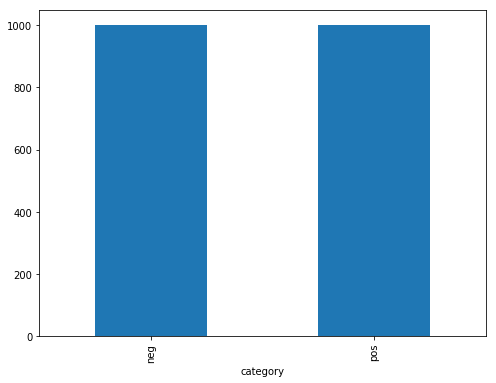

In [0]:
fig = plt.figure(figsize=(8,6))
df.groupby('category')['text'].count().plot.bar(ylim=0)
plt.show()

In [0]:
#Preprocess function 
#Exclude:
wordEX = []
posEx = ['PUNCT','SPACE']
is_stopEx = []
lemmaEx = []
stemEx = []


def text_transf(texts, method = 'lemma_stem'):
  txt2 = []
  for w in texts:
    if (w.text.lower() in wordEX) | (w.pos_ in posEx) | (w.is_stop in is_stopEx) | (w.lemma_ in lemmaEx) | (ps.stem(w.text.lower()) in stemEx):
      continue
    if method == 'word':
      txt2.append(w.text.lower())
    elif method == 'lemma':
      txt2.append(w.lemma_.lower())
    elif method == 'stem':
      txt2.append(ps.stem(w.text.lower()))
    elif method == 'lemma_stem':
      txt2.append(ps.stem(w.lemma_))
      
  return txt2

In [0]:
df['text'] = df['text'].apply(text_transf)
df['length']=df['text'].apply(len) # token len
df['category_id'] = df['category'].map({'pos':1,'neg':0})

In [0]:
def join_(txt):
  return ' '.join(txt)

In [0]:
df.loc[:,'text'] = df['text'].apply(join_)

In [0]:
df.head()

,docuName,text,category,length,category_id
0,cv000_29590.txt,film adapt from comic book have have plenti of...,pos,717,1
1,cv003_11664.txt,jaw be a rare film that grab -pron- attent bef...,pos,1027,1
2,cv004_11636.txt,moviemak be a lot like be the gener manag of a...,pos,677,1
3,cv008_29435.txt,after bloodi clash and independ win lumumba re...,pos,263,1
4,cv001_18431.txt,everi now and then a movi come along from a su...,pos,705,1


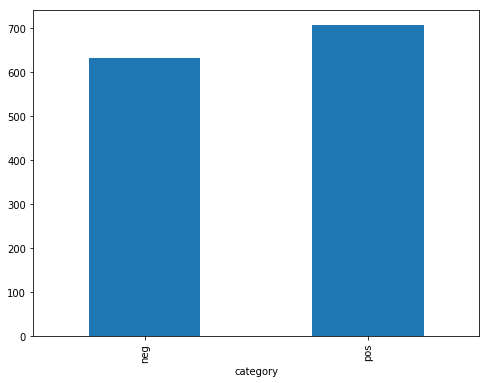

In [0]:
#plot token length
fig = plt.figure(figsize=(8,6))
df.groupby('category')['length'].mean().plot.bar(ylim=0)
plt.show()

In [0]:
df.to_csv(MAINDIR + 'data_preproces.csv', index = False)

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////